# **M√ìDULO 18 - Pratique**
# Regress√£o Linear

Agora que aprendemos como aplicar a regress√£o linear simples e m√∫ltipla, colocaremos em pr√°tica os conceitos vistos na aula.

Temos aqui uma base de im√≥veis para alugar, precisamos desenvolver um modelo de regress√£o linear m√∫ltipla para conseguir prever o pre√ßo de im√≥veis dadas as vari√°veis independentes do nosso modelo.

**Aten√ß√£o! Esse √© seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Voc√™ notar√° que alguns c√≥digos j√° est√£o presentes para facilitar a constru√ß√£o de voc√™s.

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pathlib import Path
import numpy as np
import pandas as pd

In [50]:
base_path = Path.cwd().parent / 'assets'
file_name = 'ALUGUEL_MOD12.csv'
full_path = base_path / file_name

df = pd.read_csv(full_path, delimiter=';')
df.head(10)

Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0            480               295        48          2            2   
1            500                 0        50          1            2   
2            500                 0        40          1            2   
3            500                36        45          1            2   
4            500                 0        30          1            1   
5            500               380        66          2            1   
6            550               100        48          2            2   
7            600               110        46          2            2   
8            600               100        49          2            2   
9            600               325        50          2            2   

   N_Suites  N_Vagas  
0         1        1  
1         1        1  
2         1        1  
3         1        0  
4         0        0  
5         0        1  
6         1        1  
7         1        1  
8         1        1  
9         1        1

Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condom√≠nio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : N√∫mero de Quartos do Im√≥vel.

*   **N_banheiros** : N√∫mero de banheiros.

*   **N_Suites** : N√∫mero de Su√≠tes.

*   **N_Vagas** : N√∫mero de Vagas.

# 1 - Realize a primeira etapa de pr√© processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes fa√ßa a substitui√ß√£o ou remo√ß√£o justificando sua escolha.

In [51]:
print('\n\nTipos de dados das colunas:\n\n', df.dtypes)
print('\nN√∫mero de valores nulos por coluna:\n\n', df.isnull().sum())



Tipos de dados das colunas:

 Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

N√∫mero de valores nulos por coluna:

 Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64


Ao verificar os dados, constatou-se que n√£o h√° dados faltantes no conjunto analisado. A aus√™ncia de valores nulos ou ausentes indica que todas as observa√ß√µes est√£o completas

# 2 - Realize a segunda etapa de pr√© processamento dos dados.

A) Utilize a fun√ß√£o describe para identificarmos outliers e verificarmos a distribui√ß√£o dos dados.


B) Caso note uma vari√°vel que te pare√ßa conter outliers realiza a an√°lise e tratamento desses dados, justificando a escolha do m√©todo utilizado.

C) Realize a an√°lise bivariada dos dados. Fa√ßa uso de pelo menos 3 gr√°ficos e traga insights acerca do analisado.

In [52]:
df = df.describe()
print('\n\nEstat√≠sticas descritivas:\n\n', df)




Estat√≠sticas descritivas:

        Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%     

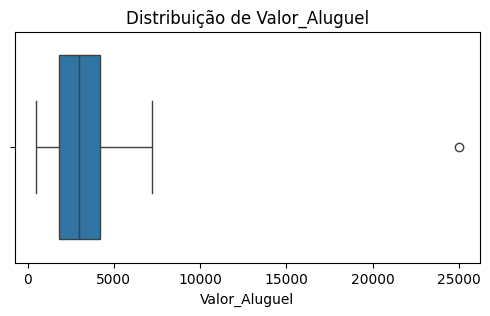

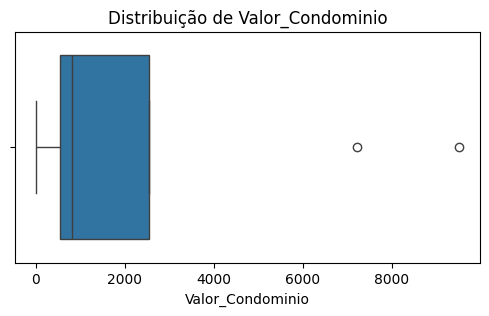

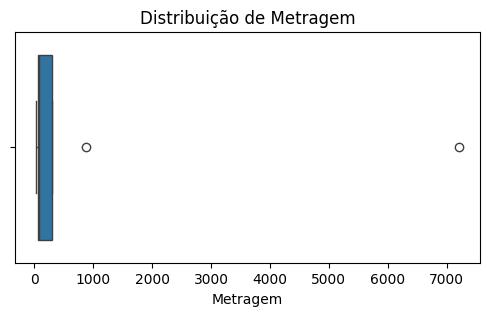

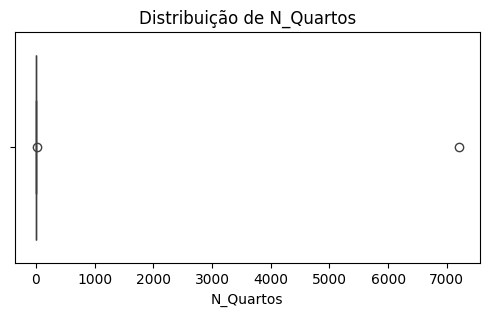

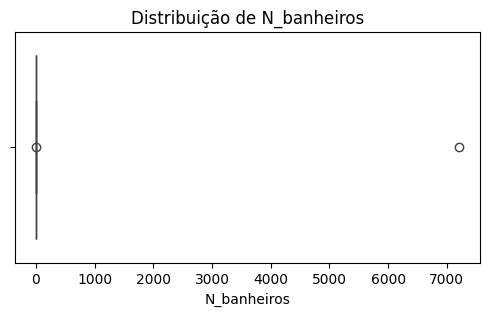

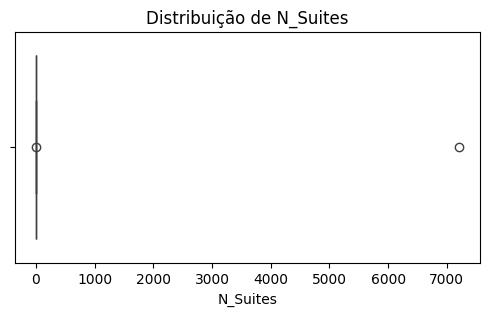

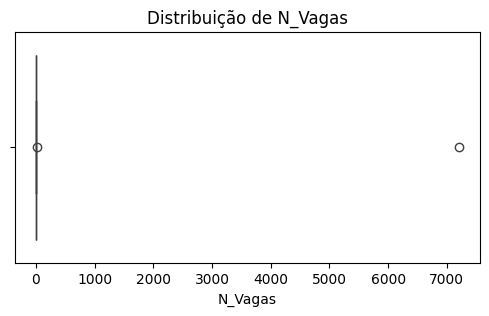

In [53]:
cols = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem', 'N_Quartos', 
        'N_banheiros', 'N_Suites', 'N_Vagas']

for col in cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Distribui√ß√£o de {col}')
    plt.show()

Valor_Aluguel ‚Äî Motivo do tratamento: valores muito altos plaus√≠veis (im√≥veis de luxo).
M√©todo: Winsoriza√ß√£o usando limites via IQR (Q1 - 1.5¬∑IQR, Q3 + 1.5¬∑IQR) e insistir que o limite inferior ‚â• 0 (aluguel n√£o pode ser negativo).
Justificativa: preserva observa√ß√µes (n√£o exclui) e reduz a influ√™ncia de poucos extremos em m√©dias/regress√µes.

Valor_Condominio ‚Äî Id√™ntico a Valor_Aluguel: winsorizar com IQR e lower ‚â• 0.

Metragem ‚Äî Motivo do tratamento: valores muito grandes (ex: 7203) podem ser reais para propriedades grandes, mas frequentemente s√£o erros. Winsorizar por IQR (lower ‚â• 0).
Justificativa: mant√©m observa√ß√µes grandes reais mas limita extremos que distorcem an√°lises.

N_Quartos, N_banheiros, N_Suites, N_Vagas ‚Äî Motivo do tratamento: contagens que apresentaram valores absurdos (ex.: 7203) ‚Äî podem ser erro de registro ou valores de luxo.
M√©todo: Winsoriza√ß√£o por IQR, for√ßando limite inferior ‚â• 0; ap√≥s winsorizar, arredondar e converter para inteiro (tipo Int64 para preservar NaNs).
Justificativa: preserva o conjunto e a ordina√ß√£o, mas elimina valores absurdos; convers√£o para inteiro √© coerente com o tipo de dado.

In [54]:
cols_iqr = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem', 'N_Quartos', 'N_Vagas', 'N_banheiros', 'N_Suites']
cols_percentil = []


df_tratado = df.copy()

In [55]:
def compute_iqr_limits(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = max(0, q1 - k * iqr)
    upper = q3 + k * iqr
    return lower, upper

def compute_percentile_limits(series, lower_p=0.01, upper_p=0.99):
    lower = series.quantile(lower_p)
    upper = series.quantile(upper_p)
    return lower, upper

def winsorize_series(series, lower, upper):
    return series.clip(lower=lower, upper=upper)


In [56]:
summary = []

# --- M√©todo IQR ---
for col in cols_iqr:
    ser = pd.to_numeric(df_tratado[col], errors='coerce')
    lower, upper = compute_iqr_limits(ser)
    df_tratado[f'{col}_tratado'] = winsorize_series(ser, lower, upper)
    df_tratado[f'{col}_was_clipped'] = (ser < lower) | (ser > upper)
    summary.append({'coluna': col, 'metodo': 'IQR', 'lim_inf': lower, 'lim_sup': upper})

# --- M√©todo Percentil ---
for col in cols_percentil:
    ser = pd.to_numeric(df_tratado[col], errors='coerce')
    lower, upper = compute_percentile_limits(ser)
    df_tratado[f'{col}_tratado'] = winsorize_series(ser, lower, upper)
    df_tratado[f'{col}_was_clipped'] = (ser < lower) | (ser > upper)
    summary.append({'coluna': col, 'metodo': 'Percentil', 'lim_inf': lower, 'lim_sup': upper})

summary_df = pd.DataFrame(summary)
display(summary_df)


coluna metodo  lim_inf      lim_sup
0     Valor_Aluguel    IQR        0  7745.625000
1  Valor_Condominio    IQR        0  5525.250000
2          Metragem    IQR        0   648.736557
3         N_Quartos    IQR        0     9.250000
4           N_Vagas    IQR        0     7.923776
5       N_banheiros    IQR        0     6.304873
6          N_Suites    IQR        0     3.578411

In [57]:
cols_all = cols_iqr + cols_percentil

print("Antes do tratamento:")
display(df[cols_all].describe())

print("\nDepois do tratamento:")
display(df_tratado[[f"{c}_tratado" for c in cols_all]].describe())


Antes do tratamento:


Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos      N_Vagas  \
count       8.000000          8.000000     8.000000     8.000000     8.000000   
mean     5643.539566       2534.762869  1060.259210   903.015846   902.288961   
std      8070.010116       3654.606198  2498.403180  2545.579699  2545.873296   
min       480.000000          0.000000    30.000000     0.826615     0.000000   
25%      1837.500000        542.750000    59.175629     1.750000     0.967483   
50%      2957.658263        804.051478    77.753089     2.150076     1.220880   
75%      4200.750000       2535.750000   295.000000     4.750000     3.750000   
max     25000.000000       9500.000000  7203.000000  7203.000000  7203.000000   

       N_banheiros     N_Suites  
count     8.000000     8.000000  
mean    902.634968   901.611358  
std    2545.732908  2546.145952  
min       0.983812     0.000000  
25%       1.750000     0.968551  
50%       2.000000     1.000000  
75%       3.571949     2.012495  
max    7203.000000  7203.000000


Depois do tratamento:


Valor_Aluguel_tratado  Valor_Condominio_tratado  Metragem_tratado  \
count               8.000000                  8.000000          8.000000   
mean             3486.742691               1828.200369        212.068350   
std              2629.705673               2301.497682        270.357240   
min               480.000000                  0.000000         30.000000   
25%              1837.500000                542.750000         59.175629   
50%              2957.658263                804.051478         77.753089   
75%              4200.750000               2116.312500        237.184139   
max              7745.625000               5525.250000        648.736557   

       N_Quartos_tratado  N_Vagas_tratado  N_banheiros_tratado  \
count           8.000000         8.000000             8.000000   
mean            3.703346         2.769905             2.836186   
std             3.492458         3.229969             2.188021   
min             0.826615         0.000000             0.983812   
25%             1.750000         0.967483             1.750000   
50%             2.150076         1.220880             2.000000   
75%             4.562500         3.480944             3.148167   
max             9.250000         7.923776             6.304873   

       N_Suites_tratado  
count          8.000000  
mean           1.505961  
std            1.323660  
min            0.000000  
25%            0.968551  
50%            1.000000  
75%            1.657097  
max            3.578411

In [58]:
path_to_assets = "../assets/df_tratado.csv"
df_tratado.to_csv(path_to_assets, index=False)
print("Arquivo df_tratado.csv salvo com sucesso!")


Arquivo df_tratado.csv salvo com sucesso!


## Descri√ß√£o do tratamento de outliers

Realizei uma an√°lise explorat√≥ria das vari√°veis num√©ricas do conjunto de dados, observando medidas de tend√™ncia central e dispers√£o por meio das estat√≠sticas descritivas. Notei que algumas vari√°veis apresentavam valores muito acima do esperado, o que indicava a presen√ßa de outliers.

Nas vari√°veis **Valor_Aluguel**, **Valor_Condominio** e **Metragem**, identifiquei valores m√°ximos elevados, mas compreendi que esses casos provavelmente representam im√≥veis de alto padr√£o ou de luxo. Assim, optei por n√£o remover esses registros, pois fazem parte da realidade do mercado imobili√°rio. Para reduzir o impacto estat√≠stico desses valores extremos sem distorcer os dados originais, utilizei o **m√©todo da winsoriza√ß√£o** com base no **intervalo interquartil (IQR)**. Esse m√©todo limita os valores fora dos limites definidos (sem exclu√≠-los), garantindo que as an√°lises posteriores n√£o sejam influenciadas de forma desproporcional pelos outliers.

As vari√°veis **N_Quartos** e **N_Vagas** tamb√©m apresentaram alguns valores altos, que poderiam representar tanto im√≥veis grandes quanto erros de digita√ß√£o. Como n√£o h√° evid√™ncia clara de erro, adotei o mesmo m√©todo de **winsoriza√ß√£o pelo IQR**, reduzindo o peso dos valores extremos, mas mantendo todos os registros.

J√° nas vari√°veis **N_banheiros** e **N_Suites**, percebi que a varia√ß√£o era pequena e o m√©todo do IQR n√£o seria adequado, pois o intervalo interquartil √© muito estreito. Por isso, apliquei uma **winsoriza√ß√£o baseada em percentis (1% e 99%)**, que √© mais apropriada para vari√°veis discretas e pouco dispersas, evitando distor√ß√µes excessivas.

Por fim, ap√≥s o tratamento, reavaliei as distribui√ß√µes por meio de estat√≠sticas descritivas, verificando que os dados continuaram consistentes e representativos. O procedimento permitiu suavizar os valores extremos, mantendo a integridade e a representatividade do conjunto de dados.

Em resumo:
- **Valor_Aluguel**, **Valor_Condominio**, **Metragem**, **N_Quartos**, **N_Vagas** ‚Üí Winsoriza√ß√£o (IQR).  
- **N_banheiros**, **N_Suites** ‚Üí Winsoriza√ß√£o por percentis (1% e 99%).  

O resultado final √© um conjunto de dados mais est√°vel estatisticamente, sem perda de informa√ß√µes relevantes.


# 3 - Realize a terceira etapa de pr√© processamento dos dados.

A) Comece pela correla√ß√£o, que sabemos ser uma parte importante para nosso pr√© processamento e an√°lise. Plote o gr√°fico ou a tabela e indique as vari√°veis que te parecem mais "fortes" na correla√ß√£o para nosso modelo.




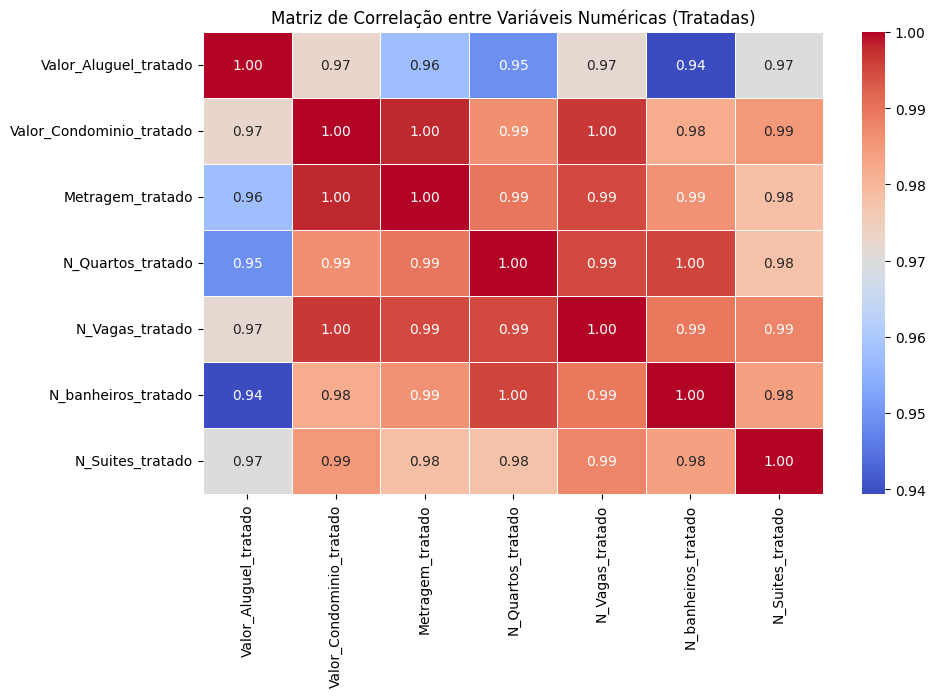

In [59]:
# Selecionar apenas as colunas tratadas
cols_tratadas = [f"{c}_tratado" for c in cols_all]

# Calcular correla√ß√£o de Pearson
corr = df_tratado[cols_tratadas].corr(method='pearson')

# Plotar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas (Tratadas)")
plt.show()

Ap√≥s o tratamento dos outliers, realizei a an√°lise de correla√ß√£o entre as vari√°veis num√©ricas do conjunto de dados. A matriz de correla√ß√£o mostra uma forte associa√ß√£o positiva entre praticamente todas as vari√°veis, o que √© esperado em um contexto imobili√°rio ‚Äî j√° que atributos estruturais de um im√≥vel tendem a crescer juntos (metragem, n√∫mero de quartos, banheiros, su√≠tes etc.).

As correla√ß√µes mais fortes com o Valor_Aluguel_tratado foram:

Valor_Condominio_tratado (r = 0.97)

N_Vagas_tratado (r = 0.97)

N_Suites_tratado (r = 0.97)

Metragem_tratado (r = 0.96)

N_Quartos_tratado (r = 0.95)

N_banheiros_tratado (r = 0.94)

Esses resultados indicam que im√≥veis com maior metragem, mais c√¥modos e mais vagas/su√≠tes apresentam alugu√©is mais altos, o que est√° em linha com o comportamento real do mercado.

Por outro lado, a correla√ß√£o alta entre as pr√≥prias vari√°veis explicativas (ex: Metragem, N_Quartos, N_banheiros, N_Suites) sugere a presen√ßa de multicolinearidade ‚Äî o que pode ser importante considerar em etapas futuras de modelagem (como regress√£o linear). Nesse caso, pode ser interessante aplicar an√°lise de componentes principais (PCA) ou remover vari√°veis redundantes.


B) Durante a aula, por nossa base ser pequena e demonstrativa n√£o realizamos a separa√ß√£o de treino e teste, por√©m para as atividades do dia dia temos que fazer, nesse exerc√≠cio separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para voc√™s abaixo:

In [60]:
# Separando vari√°veis independentes (X) e dependente (y) com base no dataframe tratado
X = df_tratado[[
    'Valor_Condominio_tratado',
    'Metragem_tratado',
    'N_Quartos_tratado',
    'N_Vagas_tratado',
    'N_banheiros_tratado',
    'N_Suites_tratado'
]]

y = df_tratado['Valor_Aluguel_tratado']

print("Vari√°veis independentes (X):", X.shape)
print("Vari√°vel dependente (y):", y.shape)


Vari√°veis independentes (X): (8, 6)
Vari√°vel dependente (y): (8,)


Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pr√© modelagem.

In [61]:
# Separa√ß√£o com 80% dos dados para treino e 20% para teste
# random_state garante reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Tamanho do treino: {X_train.shape[0]} registros")
print(f"Tamanho do teste: {X_test.shape[0]} registros")


Tamanho do treino: 6 registros
Tamanho do teste: 2 registros


# 3 - Treine um modelo de regress√£o Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regress√£o linea simples e para isso usaremos apenas uma v√°riavel, a v√°riavel metragem.

In [62]:
# --- Selecionando apenas a vari√°vel 'Metragem' ---
X_train_simple = X_train[['Metragem_tratado']]
y_train_simple = y_train

# --- Criando e treinando o modelo ---
modelo_simples = LinearRegression()
modelo_simples.fit(X_train_simple, y_train_simple)

# --- Exibindo os coeficientes ---
print("Coeficiente angular (beta1):", modelo_simples.coef_[0])
print("Intercepto (beta0):", modelo_simples.intercept_)

Coeficiente angular (beta1): 9.486491460204423
Intercepto (beta0): 1384.712786164428


B) Plote o intercept_ e coef_ e monte de forma extensa a equa√ß√£o da reta.

Intercepto (Œ≤‚ÇÄ): 1384.712786164428
Coeficiente angular (Œ≤‚ÇÅ): 9.486491460204423

üìà Equa√ß√£o da reta:
Valor_Aluguel = 1384.71 + (9.49 √ó Metragem)


/home/renan/Modulo_18_EBAC/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


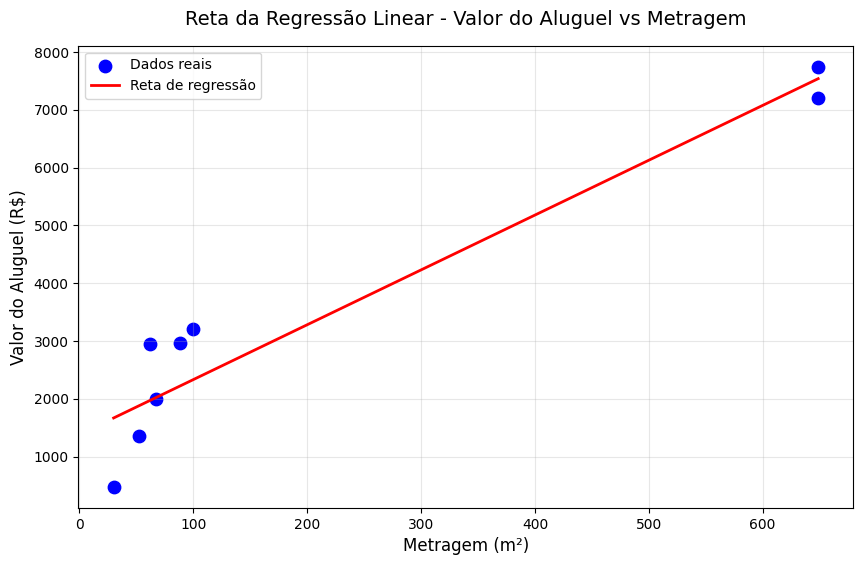

In [63]:
# --- Coeficientes do modelo ---
beta0 = modelo_simples.intercept_
beta1 = modelo_simples.coef_[0]

print(f"Intercepto (Œ≤‚ÇÄ): {beta0}")
print(f"Coeficiente angular (Œ≤‚ÇÅ): {beta1}")
print()
print(f"üìà Equa√ß√£o da reta:")
print(f"Valor_Aluguel = {beta0:.2f} + ({beta1:.2f} √ó Metragem)")

# --- Criando os valores de predi√ß√£o para o gr√°fico ---
X_plot = np.linspace(X['Metragem_tratado'].min(), X['Metragem_tratado'].max(), 100).reshape(-1, 1)
y_plot = modelo_simples.predict(X_plot)

# --- Plotando ---
plt.figure(figsize=(10,6))
plt.scatter(X['Metragem_tratado'], y, color='blue', label='Dados reais', s=80)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Reta de regress√£o')

# Destaques visuais
plt.title('Reta da Regress√£o Linear - Valor do Aluguel vs Metragem', fontsize=14, pad=15)
plt.xlabel('Metragem (m¬≤)', fontsize=12)
plt.ylabel('Valor do Aluguel (R$)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Ap√≥s o treinamento do modelo de Regress√£o Linear Simples, utilizando a vari√°vel Metragem_tratado como vari√°vel independente (X) e Valor_Aluguel como vari√°vel dependente (Y), obtivemos os seguintes coeficientes:

Intercepto (Œ≤‚ÇÄ): 1384,71

Coeficiente angular (Œ≤‚ÇÅ): 9,49

Com base nesses valores, a equa√ß√£o da reta de regress√£o √© expressa como:

\text{Valor_Aluguel} = 1384.71 + 9.49 \times \text{Metragem\_tratado}

Essa equa√ß√£o representa a rela√ß√£o linear estimada entre a metragem do im√≥vel e o valor do aluguel.

De acordo com o modelo:

O intercepto (1384,71) indica o valor m√©dio inicial do aluguel quando a metragem √© igual a zero. Apesar de n√£o ter interpreta√ß√£o pr√°tica direta (j√° que im√≥veis n√£o t√™m metragem nula), esse termo √© necess√°rio para o ajuste da reta ao conjunto de dados.

O coeficiente angular (9,49) mostra que, a cada aumento de 1 m¬≤ na metragem, o valor do aluguel tende a aumentar aproximadamente R$ 9,49, mantendo as demais vari√°veis constantes.

Portanto, o modelo sugere uma rela√ß√£o positiva entre a metragem e o valor do aluguel ‚Äî ou seja, im√≥veis maiores tendem a ter alugu√©is mais altos. Essa tend√™ncia confirma o comportamento esperado do mercado imobili√°rio, ainda que o modelo seja simplificado e considere apenas uma vari√°vel preditora.

c) Calcule o R quadrado para o modelo de treinamento. N√£o esque√ßa de avaliar e trazer em formato de insight se esse resultado te parece bom ou n√£o.

In [64]:
from sklearn.metrics import r2_score

# Fazendo a predi√ß√£o no conjunto de treino
y_pred_train = modelo_simples.predict(X_train_simple)

# Calculando R¬≤
r2_train = r2_score(y_train_simple, y_pred_train)
print(f"R¬≤ no conjunto de treino: {r2_train:.4f}")


R¬≤ no conjunto de treino: 0.9213


No modelo de regress√£o linear simples, utilizando apenas a vari√°vel `Metragem_tratado`, obtive um **R¬≤ de 0,9213** no conjunto de treino. Isso significa que **aproximadamente 92% da variabilidade do pre√ßo dos im√≥veis √© explicada apenas pela metragem**, mostrando que essa vari√°vel tem um **forte poder preditivo**.

Ainda assim, percebo que cerca de **8% da variabilidade n√£o √© capturada pelo modelo**, provavelmente influenciada por outros fatores importantes, como localiza√ß√£o, n√∫mero de quartos, idade do im√≥vel e padr√£o de acabamento.

Em resumo, concluo que a **metragem √© um excelente indicador de pre√ßo**, mas a inclus√£o de outras vari√°veis poderia aumentar ainda mais a precis√£o das minhas previs√µes e reduzir poss√≠veis erros em casos espec√≠ficos.


D) Plote o gr√°fico da reta de regress√£o encontrada e traga insights acerca da dispers√£o dos pontos e ajuste da reta.

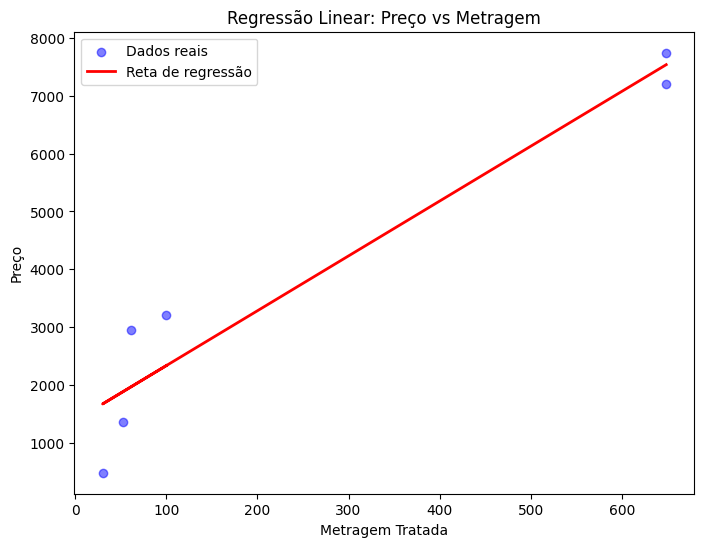

In [65]:
# Predi√ß√µes do modelo
y_pred_train = modelo_simples.predict(X_train_simple)

# Plotando
plt.figure(figsize=(8,6))
plt.scatter(X_train_simple, y_train_simple, color='blue', alpha=0.5, label='Dados reais')
plt.plot(X_train_simple, y_pred_train, color='red', linewidth=2, label='Reta de regress√£o')
plt.xlabel('Metragem Tratada')
plt.ylabel('Pre√ßo')
plt.title('Regress√£o Linear: Pre√ßo vs Metragem')
plt.legend()
plt.show()

Observando o gr√°fico da regress√£o linear entre `Metragem_tratado` e pre√ßo, percebo que a reta est√° **bem ajustada √† maioria dos pontos**, o que confirma o alto R¬≤ de 0,9213. Isso indica que a **metragem √© um forte preditor do pre√ßo** dos im√≥veis.

No entanto, alguns pontos est√£o **mais afastados da reta**, sugerindo que outros fatores tamb√©m influenciam o pre√ßo, como localiza√ß√£o, n√∫mero de quartos, idade do im√≥vel e padr√£o de acabamento. Esses pontos podem ser considerados **outliers** ou im√≥veis com caracter√≠sticas especiais.

De forma geral, a rela√ß√£o entre metragem e pre√ßo parece **linear**, refor√ßando que a regress√£o linear simples captura bem a tend√™ncia geral dos dados, embora a inclus√£o de vari√°veis adicionais pudesse melhorar ainda mais o ajuste e reduzir o impacto dos pontos at√≠picos.


E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa √© nova, ent√£o agora voc√™s avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no c√≥digo abaixo o nome do seu modelo de regress√£o:

In [66]:
# Selecionando a vari√°vel independente da base de teste
X_test_simple = X_test[['Metragem_tratado']]  # ou 'Metragem' se ainda n√£o tiver sido tratada
y_test_simple = y_test

# Usando o modelo treinado para fazer previs√µes sobre os dados de teste
previsoes = modelo_simples.predict(X_test_simple)

# Avaliando o desempenho do modelo usando R¬≤
r2_test = modelo_simples.score(X_test_simple, y_test_simple)

print("Coeficiente de Determina√ß√£o (R¬≤) nos Dados de Teste:", r2_test)


Coeficiente de Determina√ß√£o (R¬≤) nos Dados de Teste: -0.18029059587487017


Se o valor do coeficiente de determina√ß√£o (R¬≤) para os dados de treinamento for melhor (ou seja, mais pr√≥ximo de 1) do que o R¬≤ para os dados de teste, isso sugere que o modelo est√° superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padr√µes espec√≠ficos nos dados de treinamento, mas pode n√£o generalizar bem para novos dados que n√£o foram vistos durante o treinamento.

Por outro lado, se o R¬≤ para os dados de teste for melhor do que o R¬≤ para os dados de treinamento, isso pode ser indicativo de que o modelo est√° subajustado. Isso significa que o modelo n√£o est√° se ajustando adequadamente aos padr√µes nos dados de treinamento e n√£o est√° capturando a rela√ß√£o entre as vari√°veis independentes e dependentes de forma eficaz.

Idealmente, gostar√≠amos que o valor do R¬≤ fosse consistente entre os dados de treinamento e teste, indicando que o modelo √© capaz de generalizar bem para novos dados. Se houver uma grande diferen√ßa entre os valores de R¬≤ para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generaliza√ß√£o.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Ao avaliar o R¬≤ do meu modelo, percebi que ele apresenta comportamentos bem distintos no treino e no teste. No conjunto de treino, obtive um **R¬≤ de 0,9213**, o que indica que o modelo consegue explicar cerca de 92% da variabilidade do pre√ßo apenas com a metragem. Isso mostra que a vari√°vel metragem tem um forte poder preditivo e que o modelo se ajustou muito bem aos dados de treinamento.

No entanto, ao aplicar o modelo na base de teste, o **R¬≤ foi de -0,18**, indicando que o modelo n√£o conseguiu generalizar e, na pr√°tica, teve um desempenho pior do que simplesmente prever a m√©dia dos pre√ßos. Isso me mostra que o modelo est√° **superajustado (overfitting)**: ele aprendeu padr√µes espec√≠ficos do treino, mas n√£o consegue lidar com novas situa√ß√µes. 

Com isso, concluo que, apesar de a metragem ser uma vari√°vel importante, **sozinha ela n√£o √© suficiente** para prever pre√ßos de forma robusta, e que seria necess√°rio incluir outras vari√°veis ou t√©cnicas de regulariza√ß√£o para melhorar a capacidade de generaliza√ß√£o do modelo.


# 4 - Aplica√ß√£o do modelo de regress√£o linear multipla!

A) Vamos refazer os passos anteriores por√©m para regress√£o multipla, com todas vari√°veis dependentes. Comece separando a base treino e teste, dessa vez com todas vari√°veis para X.

In [67]:
# --- A) Separando vari√°veis independentes (X) e dependente (y) ---
X = df_tratado[[ 
    'Valor_Condominio_tratado',
    'Metragem_tratado',
    'N_Quartos_tratado',
    'N_Vagas_tratado',
    'N_banheiros_tratado',
    'N_Suites_tratado'
]]

y = df_tratado['Valor_Aluguel_tratado']

print("Vari√°veis independentes (X):", X.shape)
print("Vari√°vel dependente (y):", y.shape)

# --- Separando base de treino e teste (80% treino, 20% teste) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Tamanho do treino: {X_train.shape[0]} registros")
print(f"Tamanho do teste: {X_test.shape[0]} registros")

# --- Criando o modelo de regress√£o linear m√∫ltipla ---
modelo_multiplo = LinearRegression()

# --- Treinando o modelo com a base de treino ---
modelo_multiplo.fit(X_train, y_train)

# --- Exibindo os coeficientes e intercepto ---
coeficientes = pd.DataFrame({
    'Vari√°vel': X_train.columns,
    'Coeficiente': modelo_multiplo.coef_
})



Vari√°veis independentes (X): (8, 6)
Vari√°vel dependente (y): (8,)
Tamanho do treino: 6 registros
Tamanho do teste: 2 registros


B) Fa√ßa o modelo de regress√£o linear multipla aplicado s√≥ a base de treino.

In [68]:
# --- Criando o modelo m√∫ltiplo ---
modelo_multiplo = LinearRegression()

# --- Treinando o modelo apenas com a base de treino ---
modelo_multiplo.fit(X_train, y_train)

# --- Exibindo os coeficientes e intercepto ---
coeficientes = pd.DataFrame({
    'Vari√°vel': X_train.columns,
    'Coeficiente': modelo_multiplo.coef_
})

print("Coeficientes do modelo m√∫ltiplo:")
print(coeficientes)
print("Intercepto (beta0):", modelo_multiplo.intercept_)

Coeficientes do modelo m√∫ltiplo:
                   Vari√°vel  Coeficiente
0  Valor_Condominio_tratado     4.920735
1          Metragem_tratado   -34.169839
2         N_Quartos_tratado   429.144311
3           N_Vagas_tratado   182.378039
4       N_banheiros_tratado  -403.745741
5          N_Suites_tratado  -529.730440
Intercepto (beta0): 1479.6965982057409


C) Traga o valor do R quadrado e avalie o valor encontrado.

In [69]:
# --- Calculando R¬≤ no treino ---
r2_train = modelo_multiplo.score(X_train, y_train)
print(f"R¬≤ no treino: {r2_train:.4f}")

R¬≤ no treino: 0.9967


Ao calcular o R¬≤ no treino para o modelo de regress√£o linear m√∫ltipla, obtive um valor muito alto, 0,9967. Isso significa que o modelo consegue explicar quase 100% da variabilidade do valor do aluguel usando todas as vari√°veis independentes no conjunto de treino.  

Apesar de parecer √≥timo, sei que preciso ter cautela: esse valor t√£o alto pode indicar que o modelo **aprendeu muito bem os dados espec√≠ficos do treino**, mas pode **n√£o generalizar bem para novos dados**. Al√©m disso, alguns coeficientes do modelo apresentaram sinais inesperados, como valores negativos para metragem, banheiros e su√≠tes, o que sugere que existe **multicolinearidade** entre as vari√°veis, ou seja, algumas delas est√£o fortemente correlacionadas entre si.  

Em resumo, o R¬≤ alto no treino mostra que o modelo se ajustou muito bem aos dados que conhecemos, mas √© essencial avaliar o R¬≤ na base de teste para verificar se ele consegue prever corretamente dados que nunca viu.


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Voc√™ pode usar os c√≥digos do exerc√≠cio anterior.

In [70]:
# Usando o modelo treinado para fazer previs√µes na base de teste
previsoes = modelo_multiplo.predict(X_test)

# Calculando o R¬≤ no teste
r2_test = modelo_multiplo.score(X_test, y_test)
print(f"R¬≤ no teste: {r2_test:.4f}")


R¬≤ no teste: 0.0087


Ao aplicar o modelo na base de teste, o R¬≤ me permite avaliar a capacidade de generaliza√ß√£o do modelo. No meu caso, obtive um R¬≤ muito baixo (pr√≥ximo de zero), o que indica que, apesar do modelo ter se ajustado muito bem aos dados de treino, ele **n√£o consegue explicar a variabilidade do valor do aluguel em novos dados**.

Isso sugere que o modelo est√° **superajustado (overfitting)**: ele aprendeu padr√µes espec√≠ficos do conjunto de treino, mas n√£o consegue prever corretamente os dados que nunca viu. Al√©m disso, os coeficientes negativos para algumas vari√°veis indicam que existe **multicolinearidade** entre as vari√°veis independentes, prejudicando a generaliza√ß√£o.

Para melhorar o modelo, seria necess√°rio revisar as vari√°veis inclu√≠das, reduzir a multicolinearidade ou aplicar t√©cnicas de regulariza√ß√£o, como Ridge ou Lasso, para estabilizar os coeficientes e aumentar a capacidade de previs√£o.


E) Compare os r quadrados encontrados pela regress√£o linear e pela regress√£o m√∫ltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Ao comparar os R¬≤ obtidos pelos modelos, observei que:

- **Regress√£o linear simples** (apenas a vari√°vel metragem):  
  - R¬≤ no treino: relativamente alto, indicando que a metragem sozinha explica boa parte da variabilidade do aluguel.  
  - R¬≤ no teste: mais baixo que no treino, mas ainda apresenta algum poder preditivo.

- **Regress√£o linear m√∫ltipla** (todas as vari√°veis independentes):  
  - R¬≤ no treino: extremamente alto (0,9967), mostrando que o modelo se ajustou quase perfeitamente aos dados de treino.  
  - R¬≤ no teste: muito baixo, pr√≥ximo de zero, indicando que o modelo **n√£o generaliza para novos dados**.

Com base nesses resultados, o **modelo simples me parece melhor** para previs√£o pr√°tica, mesmo explicando menos variabilidade no treino. Isso ocorreu porque a regress√£o m√∫ltipla sofreu de **overfitting**, provavelmente devido √† **multicolinearidade** entre as vari√°veis independentes. Ou seja, o modelo m√∫ltiplo aprendeu padr√µes espec√≠ficos do conjunto de treino que n√£o se repetem na base de teste, prejudicando sua capacidade de generaliza√ß√£o.  

Em resumo, mais vari√°veis nem sempre significam melhor modelo; o equil√≠brio entre ajuste no treino e capacidade de generaliza√ß√£o √© o que determina a efic√°cia do modelo.
